# League of Legends Classification
**Author**: Eric Wehmueller
***

## Overview

This project is the third project for Flatiron School's bootcamp program in Data Science.  We are being placed into a hypothetical situation as a Data Scientist and hoping to provide value to our business for the scenario we are given.

## Business Problem

I have been hired by the esports organization Cloud9 as a player coach/analyst for the professional League of Legends team.  They are competing at the top level and are looking to win every game they possibly can, as there is a lot of money on the line.  My job is to help them determine the most important factors in winning League of Legends games.  I am to investigate what should I be advising our players to focus on in the first 10-15 minutes of each game to provide the highest chance to win the game.

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, plot_confusion_matrix

## Data Investigation and Cleaning

In [17]:
file1 = "data\high_diamond_ranked_10min.csv"
file2 = "data\Challenger_Ranked_Games_10minute.csv"
df = pd.read_csv(file1)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

In [19]:
pd.set_option('display.max_columns', None)
df.head(10)

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,0,0,17210,6.6,17039,195,36,643,-8,19.5,1721.0,15,6,0,6,9,8,0,0,0,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,0,0,14712,6.6,16265,174,43,-2908,-1173,17.4,1471.2,12,1,1,5,5,2,2,1,1,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,0,0,16113,6.4,16221,186,46,-1172,-1033,18.6,1611.3,15,3,1,11,7,14,0,0,0,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,1,0,15157,7.0,17954,201,55,-1321,-7,20.1,1515.7,15,2,1,5,4,10,0,0,0,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,0,0,16400,7.0,18543,210,57,-1004,230,21.0,1640.0,17,2,1,6,6,7,1,1,0,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4
5,4475365709,1,18,0,0,5,3,6,1,1,0,0,15899,7.0,18161,225,42,698,101,22.5,1589.9,36,5,1,3,5,2,0,0,0,0,15201,7.0,18060,221,59,-698,-101,22.1,1520.1
6,4493010632,1,18,3,1,7,6,7,1,1,0,0,16874,6.8,16967,225,53,2411,1563,22.5,1687.4,57,1,0,6,7,9,0,0,0,0,14463,6.4,15404,164,35,-2411,-1563,16.4,1446.3
7,4496759358,0,16,2,0,5,13,3,0,0,0,0,15305,6.4,16138,209,48,-2615,-800,20.9,1530.5,15,0,1,13,5,11,1,1,0,0,17920,6.6,16938,157,54,2615,800,15.7,1792.0
8,4443048030,0,16,3,0,7,7,8,0,0,0,0,16401,7.2,18527,189,61,-1979,-771,18.9,1640.1,15,2,1,7,7,5,2,1,1,0,18380,7.2,19298,240,53,1979,771,24.0,1838.0
9,4509433346,1,13,1,1,4,5,5,1,1,0,0,15057,6.8,16805,220,39,-1548,-1574,22.0,1505.7,16,2,0,5,4,4,0,0,0,0,16605,6.8,18379,247,43,1548,1574,24.7,1660.5


In [20]:
for colName in df.columns:
    print(f'-{colName}- Value Counts')
    print(df[colName].value_counts())
    print();

-gameId- Value Counts
4458383359    1
4492870986    1
4447992971    1
4517889362    1
4524077612    1
             ..
4526469771    1
4511142535    1
4503476670    1
4516498052    1
4473786370    1
Name: gameId, Length: 9879, dtype: int64

-blueWins- Value Counts
0    4949
1    4930
Name: blueWins, dtype: int64

-blueWardsPlaced- Value Counts
16     1255
15     1217
17      988
14      974
18      831
       ... 
130       1
198       1
7         1
209       1
183       1
Name: blueWardsPlaced, Length: 147, dtype: int64

-blueWardsDestroyed- Value Counts
2     2357
3     2116
1     1790
4     1413
5      746
0      745
6      345
7      163
8       68
9       22
13      14
10      12
15      12
11      12
18      11
17      10
19       9
12       8
16       8
14       7
20       3
21       2
22       2
27       1
25       1
24       1
23       1
Name: blueWardsDestroyed, dtype: int64

-blueFirstBlood- Value Counts
1    4987
0    4892
Name: blueFirstBlood, dtype: int64

-blueKills- Valu

Notes on data exploration:



***
-----Challenger Dataset-----

There are some multiple gameIDs, we are going to want to filter out duplicates.

Inclusion of Dragon TYPE data is nice. We should make binary columns for Air,Earth,Water,Fire for each side (Red/Blue)

Filter out elder dragon data/game, this should not be possible by 10 minutes and is likely a bug.

Engineer a gold diff column (Positive for blue, negative for red)

First blood columns for each team is always zero. This means the first blood data is not in this dataset. This is really unfortunate because I believe (from my own personal experience) that having this data
is actually really important if we are talking about action in the first 10 minutes of a game.

***
-----Diamond+ Dataset-----

No duplicate gameIDs, no missing values.

This dataset is much more ready to use for modeling and classification purposes, although it is a smaller dataset (10k vs 26k entries)

I'm going to continue working with this dataset from here on out, circling back to the challenger dataset if I have time.
***



In [21]:
#Todo: Visualization of Gold Diff vs Win?

## Visualizations

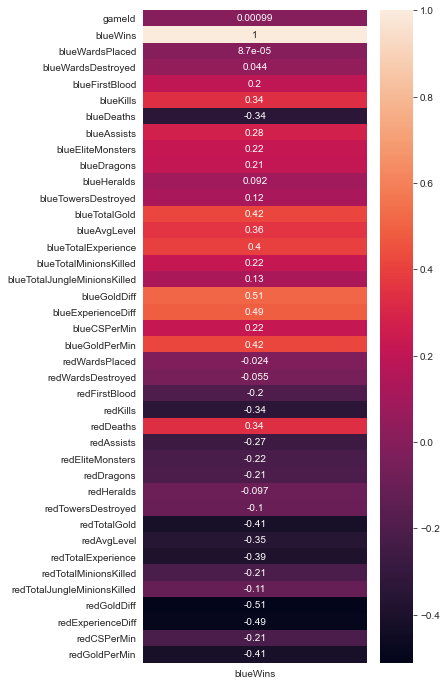

In [36]:
sns.set_style("whitegrid")

fig = plt.figure(figsize=(5, 12))
sns.heatmap(df.corr()[['blueWins']], annot=True);

<Figure size 1440x1440 with 0 Axes>

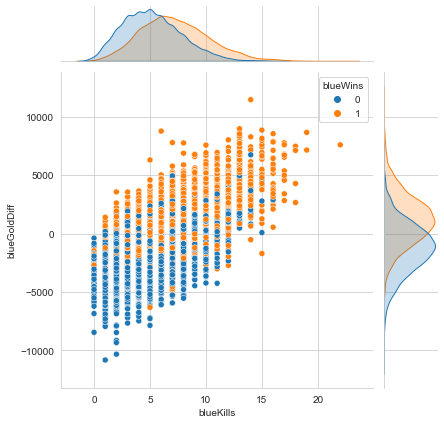

In [35]:
fig = plt.figure(figsize=(20, 20))
sns.jointplot(x='blueKills', y='blueGoldDiff', data=df, hue='blueWins');

# Modeling

## Gaussian Naive-Bayes

To start, I'm going to make a Gaussian Naive-Bayes Model. This model assumes that features are independent of one another, so I will be dropping some features to meet this assumption.  

In [7]:
#several of these columns are just diving by 10 to get "per minute" stats
#some are redundant, removing them for modelling to reduce multicollinearity
df = df.drop(['gameId', 
             'blueGoldPerMin', 'redGoldPerMin',
             'blueCSPerMin', 'redCSPerMin',
             'redGoldDiff', 'redExperienceDiff',
             'redTotalGold', 'redTotalExperience',
             'redKills', 'redDeaths'], axis=1)

In [8]:
df.head(10)

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,redWardsPlaced,redWardsDestroyed,redFirstBlood,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redAvgLevel,redTotalMinionsKilled,redTotalJungleMinionsKilled
0,0,28,2,1,9,6,11,0,0,0,0,17210,6.6,17039,195,36,643,-8,15,6,0,8,0,0,0,0,6.8,197,55
1,0,12,1,0,5,5,5,0,0,0,0,14712,6.6,16265,174,43,-2908,-1173,12,1,1,2,2,1,1,1,6.8,240,52
2,0,15,0,0,7,11,4,1,1,0,0,16113,6.4,16221,186,46,-1172,-1033,15,3,1,14,0,0,0,0,6.8,203,28
3,0,43,1,0,4,5,5,1,0,1,0,15157,7.0,17954,201,55,-1321,-7,15,2,1,10,0,0,0,0,7.0,235,47
4,0,75,4,0,6,6,6,0,0,0,0,16400,7.0,18543,210,57,-1004,230,17,2,1,7,1,1,0,0,7.0,225,67
5,1,18,0,0,5,3,6,1,1,0,0,15899,7.0,18161,225,42,698,101,36,5,1,2,0,0,0,0,7.0,221,59
6,1,18,3,1,7,6,7,1,1,0,0,16874,6.8,16967,225,53,2411,1563,57,1,0,9,0,0,0,0,6.4,164,35
7,0,16,2,0,5,13,3,0,0,0,0,15305,6.4,16138,209,48,-2615,-800,15,0,1,11,1,1,0,0,6.6,157,54
8,0,16,3,0,7,7,8,0,0,0,0,16401,7.2,18527,189,61,-1979,-771,15,2,1,5,2,1,1,0,7.2,240,53
9,1,13,1,1,4,5,5,1,1,0,0,15057,6.8,16805,220,39,-1548,-1574,16,2,0,4,0,0,0,0,6.8,247,43


In [9]:
X1= df.drop('blueWins', 1)
y1= df['blueWins']

X_train, X_test, y_train, y_test = train_test_split(
    X1,
    y1)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7409, 28), (2470, 28), (7409,), (2470,))

In [10]:
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [11]:
y_pred_train = nb.predict(X_train)
y_pred_test = nb.predict(X_test)

In [12]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.72      0.74      0.73      3709
           1       0.73      0.71      0.72      3700

    accuracy                           0.73      7409
   macro avg       0.73      0.73      0.73      7409
weighted avg       0.73      0.73      0.73      7409



In [13]:
nb?